In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('../data/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
# Select Feature

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [13]:
# Scale features

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(X)

In [19]:
# Find optimal number of cluster using wcss

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmean = KMeans(n_clusters=i, random_state=42)
    kmean.fit(x)
    wcss.append(kmean.inertia_)

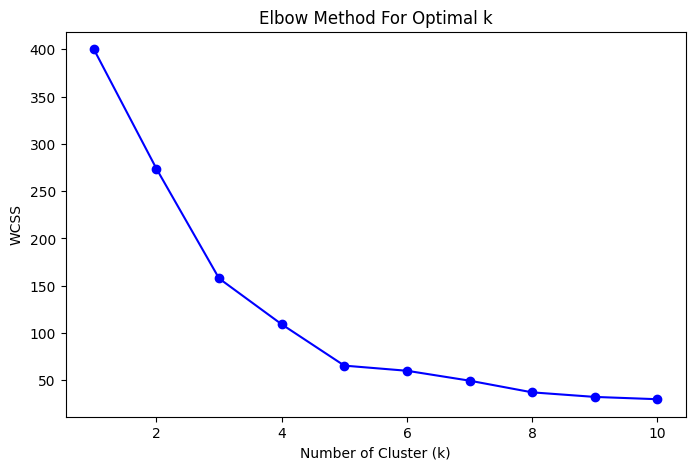

In [21]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, 'bo-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Cluster (k)')
plt.ylabel('WCSS')
plt.show()

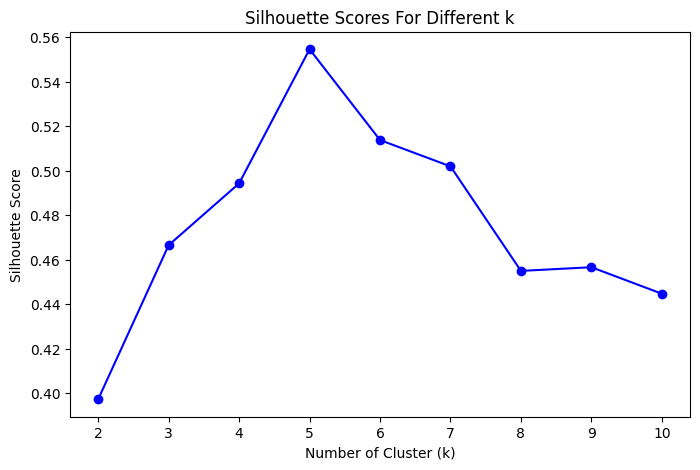

In [22]:
# Silhouette scores

from sklearn.metrics import silhouette_score
sil_score = []

for i in range(2,11):
    kmean = KMeans(n_clusters=i, random_state=42)
    lable = kmean.fit_predict(x)
    sil_score.append(silhouette_score(x, lable))
    
plt.figure(figsize=(8,5))
plt.plot(range(2,11), sil_score, 'bo-')
plt.title('Silhouette Scores For Different k')
plt.xlabel('Number of Cluster (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [23]:
optimal = 5
kmeans = KMeans(n_clusters=optimal, random_state=42)
kmeans.fit(x)

KMeans(n_clusters=5, random_state=42)

In [24]:
df['Cluster'] = kmeans.predict(x)

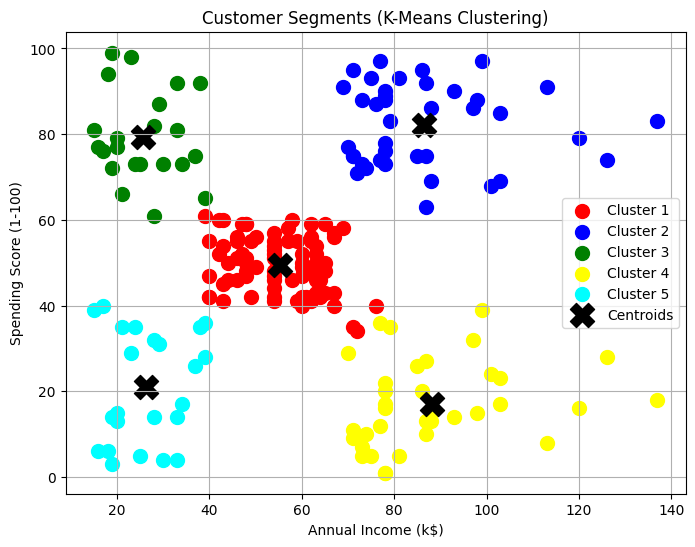

In [45]:
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'yellow', 'cyan']

for i in range(optimal):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], s=100, c=colors[i], label=f'Cluster {i+1}')

center = sc.inverse_transform(kmeans.cluster_centers_)
plt.scatter(center[:, 0], center[:, 1], s=300, c='black', marker='X', label='Centroids')

plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
df.groupby('Cluster').size()

Cluster
0    81
1    39
2    22
3    35
4    23
dtype: int64

In [39]:
df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043
